In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trainingset/plant-detection-data/Other/random_plant.jpeg
/kaggle/input/trainingset/plant-detection-data/Other/image9.jpeg
/kaggle/input/trainingset/plant-detection-data/Other/3rd_category_2.jpeg
/kaggle/input/trainingset/plant-detection-data/Other/3rd_category_1.jpeg
/kaggle/input/trainingset/plant-detection-data/Other/3rd_category_4.jpeg
/kaggle/input/trainingset/plant-detection-data/Other/3rd_category_8.png
/kaggle/input/trainingset/plant-detection-data/Other/3rd_category_3.jpeg
/kaggle/input/trainingset/plant-detection-data/Other/3rd_category_5.jpeg
/kaggle/input/trainingset/plant-detection-data/Other/image_10.jpeg
/kaggle/input/trainingset/plant-detection-data/Other/3rd_category_7.png
/kaggle/input/trainingset/plant-detection-data/Poison Ivy/poisonivy_6.jpeg
/kaggle/input/trainingset/plant-detection-data/Poison Ivy/poisonivy_7.jpeg
/kaggle/input/trainingset/plant-detection-data/Poison Ivy/poisonivy_3 copy.jpg
/kaggle/input/trainingset/plant-detection-data/Poison Ivy/p

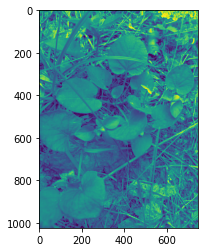

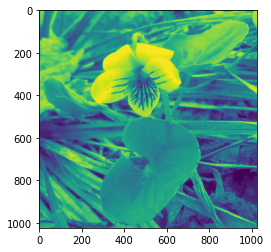

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "../input/trainingset/plant-detection-data"
VALDATA = "../input/validation-dataset/Validation_data"
CATEGORIES = ["Other", "Poison Ivy", "Poison Oak"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array)
        plt.show()
        break
    break
    
for category in CATEGORIES:
    path2 = os.path.join(VALDATA, category)
    for img in os.listdir(path2):
        img_array2 = cv2.imread(os.path.join(path2, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array2)
        plt.show()
        break
    break

In [3]:
print(img_array.shape)
print(img_array2.shape)

(1024, 746)
(1024, 1024)


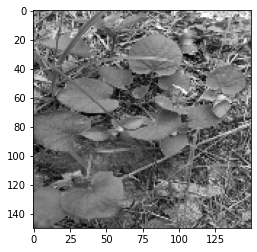

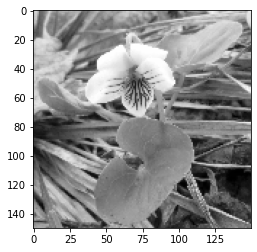

In [4]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

new_array2 = cv2.resize(img_array2, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array2, cmap = 'gray')
plt.show()

In [5]:
print(new_array.shape)
print(new_array2.shape)

(150, 150)
(150, 150)


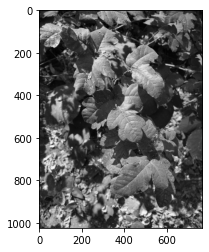

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                plt.imshow(img_array, cmap ='gray')
                plt.show
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

val_data = []

def create_val_data():
    for category in CATEGORIES:
        path2 = os.path.join(VALDATA, category)
        class_num2 = CATEGORIES.index(category)
        for img in os.listdir(path2):
            try:
                img_array2 = cv2.imread(os.path.join(path2, img), cv2.IMREAD_GRAYSCALE)
                new_array2 = cv2.resize(img_array2, (IMG_SIZE, IMG_SIZE))
                plt.imshow(img_array2, cmap ='gray')
                plt.show
                val_data.append([new_array2, class_num2])
            except Exception as e:
                pass
create_val_data()

In [7]:
print(len(training_data))
print(len(val_data))

30
30


In [8]:
import random

random.shuffle(training_data)
random.shuffle(val_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])
    
for sample in val_data[:10]:
    print(sample[1])

2
0
2
0
1
0
2
1
1
2
1
2
1
1
1
2
2
1
1
0


In [10]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

x_val = []
y_val = []
for features, label in val_data:
    x_val.append(features)
    y_val.append(label)
    
x_val = np.array(x_val).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)
valid_set = (x_val, y_val)
#y = np.array(y).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#print(X)
print(valid_set)

(array([[[[146],
         [149],
         [150],
         ...,
         [ 68],
         [ 69],
         [ 74]],

        [[105],
         [105],
         [105],
         ...,
         [ 88],
         [ 63],
         [ 97]],

        [[ 53],
         [ 51],
         [ 51],
         ...,
         [ 95],
         [ 57],
         [ 82]],

        ...,

        [[ 53],
         [ 17],
         [ 13],
         ...,
         [198],
         [ 61],
         [195]],

        [[108],
         [111],
         [111],
         ...,
         [143],
         [153],
         [196]],

        [[140],
         [149],
         [106],
         ...,
         [115],
         [188],
         [116]]],


       [[[181],
         [ 86],
         [132],
         ...,
         [231],
         [203],
         [165]],

        [[114],
         [119],
         [175],
         ...,
         [ 63],
         [103],
         [ 99]],

        [[168],
         [111],
         [220],
         ...,
         [104],
         

In [11]:
import pickle #saving dataset

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [13]:
x_val[1]

array([[[181],
        [ 86],
        [132],
        ...,
        [231],
        [203],
        [165]],

       [[114],
        [119],
        [175],
        ...,
        [ 63],
        [103],
        [ 99]],

       [[168],
        [111],
        [220],
        ...,
        [104],
        [ 93],
        [ 48]],

       ...,

       [[  2],
        [  3],
        [  4],
        ...,
        [118],
        [111],
        [ 10]],

       [[  3],
        [  1],
        [  3],
        ...,
        [136],
        [ 18],
        [ 78]],

       [[  2],
        [ 10],
        [  2],
        ...,
        [118],
        [143],
        [200]]], dtype=uint8)

In [14]:
#creating our convolutional neural network
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

#normalize data
X = X/225.0

#building model

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

learning_rate= 0.1

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", 
              optimizer="adam", 
              metrics=['accuracy'])
model.fit(X, y, batch_size=2, epochs=15, validation_data=valid_set)

model.save('PlantCNN.model')

Epoch 1/15
15/15 [==============================] - 3s 138ms/step - loss: 6.2911 - accuracy: 0.2581 - val_loss: -431.3896 - val_accuracy: 0.3333
Epoch 2/15
15/15 [==============================] - 1s 92ms/step - loss: 5.4081 - accuracy: 0.4693 - val_loss: -3.9475 - val_accuracy: 0.3333
Epoch 3/15
15/15 [==============================] - 1s 91ms/step - loss: 0.0159 - accuracy: 0.4251 - val_loss: -35.6764 - val_accuracy: 0.3333
Epoch 4/15
15/15 [==============================] - 1s 94ms/step - loss: -2.5118 - accuracy: 0.2185 - val_loss: 127.2775 - val_accuracy: 0.4333
Epoch 5/15
15/15 [==============================] - 1s 92ms/step - loss: -2.4583 - accuracy: 0.4331 - val_loss: -257.5652 - val_accuracy: 0.3333
Epoch 6/15
15/15 [==============================] - 2s 113ms/step - loss: -2.0158 - accuracy: 0.3534 - val_loss: 134.5792 - val_accuracy: 0.3667
Epoch 7/15
15/15 [==============================] - 1s 96ms/step - loss: -23.8814 - accuracy: 0.4978 - val_loss: -612.9207 - val_accurac